<font size="6">**S13 T01: Aprenentage Supervisat**</font>

# Enunciats
**Nivell 1**
- Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.


**Nivell 2**
- Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.



**Nivell 3**
- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

# Dades

## Importació i Preparació de Dades

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:


url='https://github.com/Ortegbel/PractiquesDataScience/blob/master/Exercici5/DelayedFlightsComp.csv.gz?raw=true'
df = pd.read_csv(url,  compression='gzip', usecols= ['ActualElapsedTime','CRSElapsedTime','ArrDelay','Distance','Cancelled', 
'Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])

df = df.fillna(0)

#df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1' ])
df.head()

,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,128.0,150.0,-14.0,810,0,0,0.0,0.0,0.0,0.0,0.0
1,128.0,145.0,2.0,810,0,0,0.0,0.0,0.0,0.0,0.0
2,96.0,90.0,14.0,515,0,0,0.0,0.0,0.0,0.0,0.0
3,90.0,90.0,34.0,515,0,0,2.0,0.0,0.0,0.0,32.0
4,101.0,115.0,11.0,688,0,0,0.0,0.0,0.0,0.0,0.0


In [17]:
conditions = [(df['ArrDelay']> 0),(df['ArrDelay']<= 0) ]
values = [1, 0]
df['ArrDelay2'] = np.select(conditions, values)


In [18]:
feature_cols = ['ArrDelay2','ActualElapsedTime','CRSElapsedTime','ArrDelay','Distance','Cancelled', 
                'Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

X = df[feature_cols]

In [19]:
X.shape

(1936758, 12)

<AxesSubplot:>

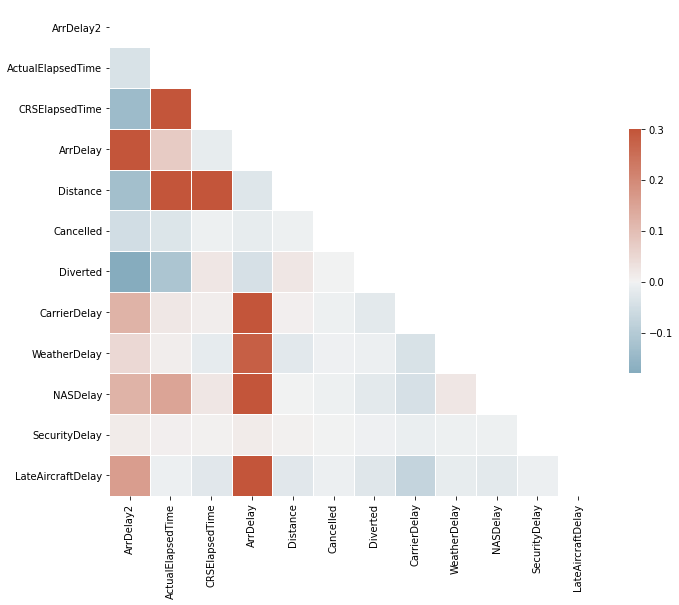

In [20]:
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Deprés de revisar les dades i les seves relacions , he definit denou les columnes que farem servir per fer els càlculs.
En aquest apartat, descartem els outliers fent servir Isolation Forest, i tot seguit Normalitzem les dades.

In [8]:
feature_cols = ['CarrierFzd', 'TailNumFzd','ActualElapsedTime', 'CRSElapsedTime', 'AirTime','OriginFzd', 'DestFzd','Distance',]

X = df[feature_cols]

In [9]:
X.shape

(1936758, 8)

## Mostra

In [21]:
XSample= X.sample(frac=0.02, random_state=1)

In [22]:
XSample.shape

(38735, 12)

## El.liminar Outliers

In [25]:
#removing outliers with Isolation forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(XSample)
X =XSample[clf.predict(XSample) == 1]

X.shape

(32959, 12)

## Normalitzar les dades

In [26]:
from sklearn.preprocessing import normalize
XScaled = normalize(X)
X = pd.DataFrame(XScaled, columns=X.columns)
X.head()

,ArrDelay2,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.003048,0.195081,0.213370,0.018289,0.957117,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000
1,0.002271,0.233892,0.204372,0.143060,0.928757,0.0,0.0,0.143060,0.0,0.00000,0.0,0.000000
2,0.001798,0.183384,0.230129,0.066522,0.951082,0.0,0.0,0.000000,0.0,0.00000,0.0,0.066522
3,0.000814,0.161081,0.147251,0.024406,0.975434,0.0,0.0,0.010576,0.0,0.01383,0.0,0.000000
4,0.003149,0.264503,0.283396,0.160591,0.900570,0.0,0.0,0.000000,0.0,0.08187,0.0,0.078721


---

# Clustering amb K means

En aquest apartat es farà una reduccio de components amb PCA i tot seguit Kmeans Clustering.

Es defininar el número de Clusters mitjançant dos mètodes: 

- l'Elbow method. 
- Silhouete Score.



In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

## PCA

In [28]:
#pca  
pca = PCA(2)
 
#Transform the data
Xpca = pca.fit_transform(X)

## Elbow Method

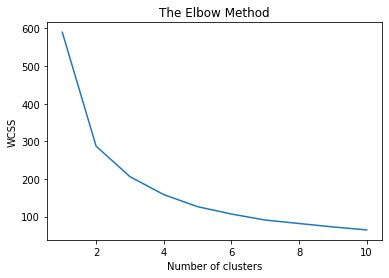

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Xpca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Després del 3 la inèrcia baixa, per això es pot asumir que podem prendre 3 clusters.

## SilhouetteVisualizer

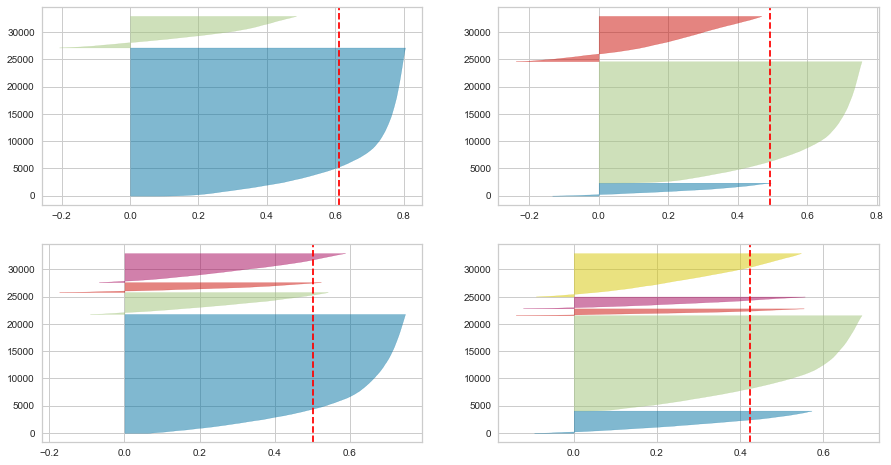

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Xpca)

Silhouette analysis:

En aquest cas es podria prendre com a n_clusters tant el 4 com el 5. ja que en ambdós casos la silhouette score per cada cluster és superior a la mitjana. Tot i que els gruixos dels clusters no són gaire equilibrats, degut a que hi ha un grup dominanat.



## K-means amb 4 clusters

In [48]:
#Import KMeans module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(Xpca)

#set the cluster centers
centers = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(label)


# Calculate Silhoutte Score
#
score = silhouette_score(Xpca, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.511


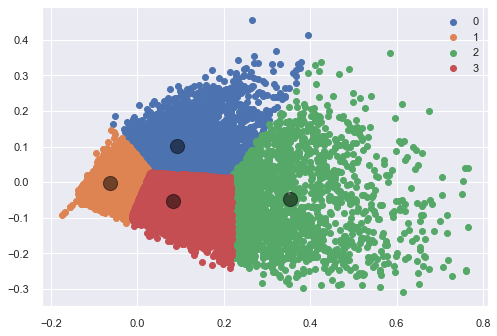

In [49]:
#plotting the results:
for i in u_labels:
    plt.scatter(Xpca[label == i , 0] , Xpca[label == i , 1]  , label = i)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);   
plt.legend()
plt.show()

## K-means amb 5 clusters

In [50]:
#Import KMeans module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(Xpca)

#set the cluster centers
centers = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(label)


# Calculate Silhoutte Score
#
score = silhouette_score(Xpca, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.422


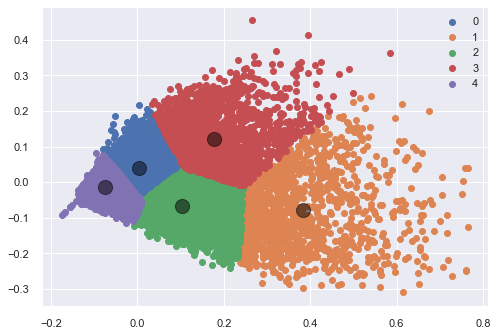

In [51]:
#plotting the results:
for i in u_labels:
    plt.scatter(Xpca[label == i , 0] , Xpca[label == i , 1]  , label = i)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);   
plt.legend()
plt.show()

Definitivament, aquest model, té un millor resultat amb 4 clusters.

# Hierarchical Agglomerative Clustering



Executarem el dendogram per comprobar denou el número de Clusters.

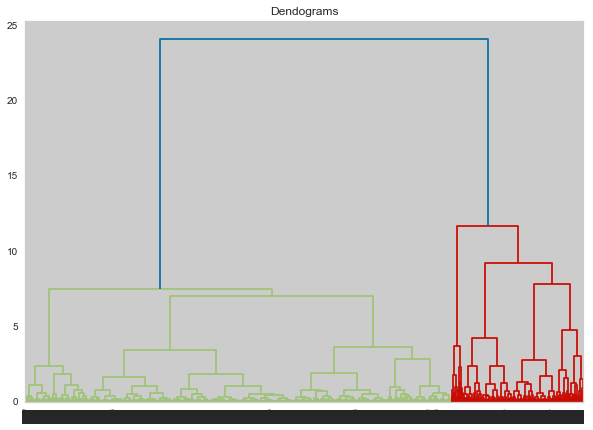

In [38]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(Xpca, method='ward'))

Aquest és un altre model de Dendogram fet amb seaborn, amb més detall.

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

C:\Users\belor\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

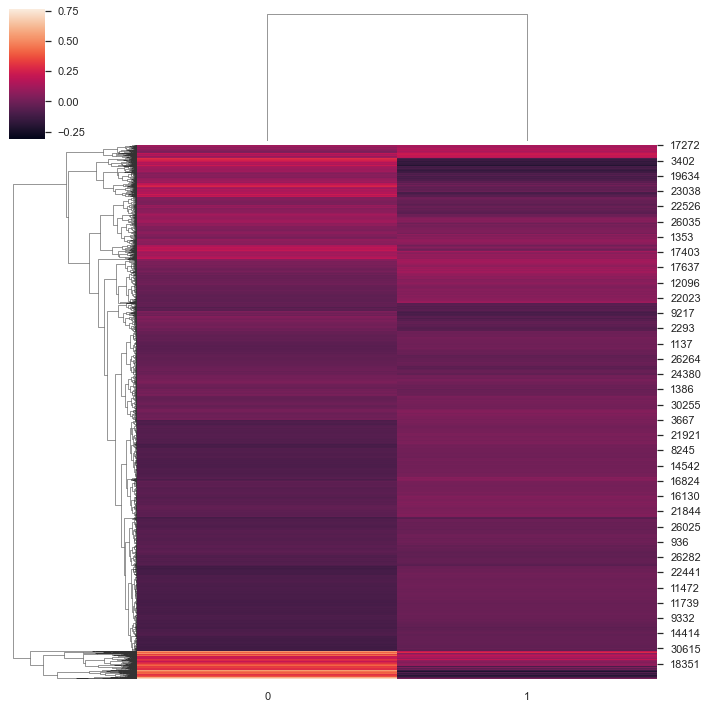

In [39]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(Xpca)

Executem el Clustering.

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean')  
cluster.fit(Xpca)
labels= cluster.labels_

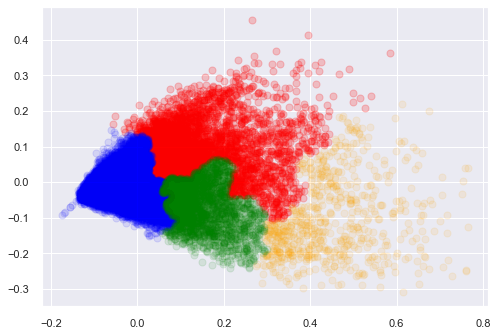

In [47]:
plt.scatter(Xpca[labels==0, 0], Xpca[labels==0, 1], s=50, marker='o', color='red', alpha=0.2)
plt.scatter(Xpca[labels==1, 0], Xpca[labels==1, 1], s=50, marker='o', color='blue', alpha=0.1)
plt.scatter(Xpca[labels==2, 0], Xpca[labels==2, 1], s=50, marker='o', color='orange', alpha=0.1)
plt.scatter(Xpca[labels==3, 0], Xpca[labels==3, 1], s=50, marker='o', color='green', alpha=0.1)
plt.show()